# COGS 118B - Final Project

# Chess AI

## Group members

- Jiayi Dong
- William Zhao
- Qianxia Hui

# Abstract 
The development of chess artificial intelligence (AI) has been significantly propelled by deep learning technologies. Traditionally, systems like AlphaZero have dominated this area but come with high financial costs due to their training methodologies, which use self-play reinforcement learning. This research seeks to construct a chess AI using supervised machine learning with data extracted from existing chess engines, specifically Stockfish, to avoid the high training costs. By leveraging over 5.5 million evaluated positions from Lichess database games, this approach aims to train a neural network to understand and predict optimal chess moves effectively. The performance of the developed AI will be measured against established metrics such as the accuracy of predicted evaluations and game outcomes against standard engines.

# Background

Chess has long been a test bed for advancements in artificial intelligence, with earlier efforts focusing on brute-force algorithms and more recent efforts on sophisticated machine learning techniques. The introduction of AlphaZero marked a significant change due to its use of deep reinforcement learning, achieving superhuman performance by learning from self-play without human interventio. However, the cost and computational demands of such technologies limit their accessibility. Recent developments have seen a rise in using supervised learning approaches, utilizing historical data from games where positions were evaluated by advanced engines like Stockfish. These methods offer a more economical and scalable alternative for training chess AIs.

# Problem Statement

The core problem addressed in this research is the high cost and computational inefficiency associated with training competitive chess AIs through self-play and reinforcement learning. This problem is measurable through the financial and computational metrics involved in the training process, quantifiable by comparing the costs and resources required for training different models, and replicable as it affects anyone attempting to develop a competitive chess AI. Our proposed solution involves training a supervised machine learning model on a dataset of pre-evaluated chess positions by Stockfish, available through the Lichess platform. This method is expected to significantly reduce cost and computational demands while maintaining a competitive level of play.

# Data
### 1. Chess Games
[Chess Games](https://www.kaggle.com/datasets/arevel/chess-games) is a chess game dataset on kaggle. The original data was downloaded from lichess.org. This dataset contains more than 6 million games played during July of 2016. Each game data consists of game type, player information, game time, opening name, game results and the whole game move. Two of the most important variables are the game results and game moves, which is stored in Movetext format, enabling us to access the game step by step. The detailed game information would help us train and test the model. Some of the game moves have Stockfish analysis evaluations for every move. The quantitative value can be used as rewards and help model to understand how good or bad a move is. Since only some of the games have the labeled evaluations, we will need to pick out those games. Furthermore, since game moves are stored in a particular format, we will need to transform it to usable format for training purpose. 

### 2. Train Your Own Chess AI
In the article [Train Your Own Chess AI](https://storage.googleapis.com/chesspic/datasets/2021-07-31-lichess-evaluations-37MM.db.gz), author provided a dataset with about 5.5+ million games from July 2021 with evaluations to each moves. This includes about 441,600,000 non-unique positions. The data is stored in pgn format and needs to be transformed into usable format. Since its a large dataset, it is stored in SQLite database. We may need to reduce the dataset size for a reasonable training time.
 
### 3. Python Chess Library
[Python Chess](https://python-chess.readthedocs.io/en/latest/index.html) is a python library that allow users to create random board in different game depth (eg. a random board in its 24 turns) in pgn format. This will allow us to create as many data as we want. However, the created board is not in a real game, the validity of the training result is questionable. We also need to access stockfish api for evaluations of the created board.

### 4. MAIA CHESS Training Dataset
[MAIA CHESS](https://csslab.cs.toronto.edu/datasets/#maia_kdd) is an AI chess model trained by Computational Social Science Lab in University of Toronto. The training dataset is accessable online which contains all the stockfish evaluated games played in 2019. All data are stored in csv format. 



# Proposed Solution
Data will be processed first. We will need to extract every move and its corresponding evaluations for each game and use them as the training and testing data. We also need to control the size of the data in order to train the model in a reasonable time.

For our project, we will be using python and pytorch to train several models, such as MinMax, Random Forest and CNN and compare the training results.

We will be using two ways to evaluate the final model. One way is to check the accuracy of the move models picked for a known game. The other way is by using other engine to play with our model and check its winning rate. The later method may require more effort since we need to create an interactive environment for two AI models.

It would be unlikely we could reach the state-of-the-art-model level as our training recourses are limited and are using relatively simple algorithms and models. But we can still compare to some of the models we can found online such as AlphaZero and MAIA Chess.

# Evaluation Metrics

### 1. Mean Absolute Error (MAE)

MAE measures how closely the AI's evaluations of chess positions align with those given by a high-quality benchmark engine (like Stockfish). This metric assesses the accuracy of the model in predicting evaluation scores, which is critical for developing a competitive chess AI.

**Mathematical Representation:**  
The Mean Absolute Error is calculated as follows:

$$\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$$

where:
- \(N\) is the total number of evaluated positions in the test set.
- \(y_i\) is the actual evaluation score provided by the benchmark model for position \(i\).
- \(\hat{y}_i\) is the predicted evaluation score by your model for position \(i\).

**Advantages:**  
- Provides a clear, numeric measure of prediction accuracy.
- Linear scoring means all errors are weighted equally.
- Effective for ensuring predictions are as close as possible to actual values, critical in strategy games like chess.

### 2. Win Rate Against Various Opponents

The Win Rate evaluates the AI's effectiveness in actual gameplay by measuring the percentage of games it wins against a variety of opponents. This metric directly reflects the AI’s practical performance and strategic success.

**Mathematical Representation:**  
The Win Rate is defined as:

$$\text{Win Rate} = \left(\frac{\text{Number of games won by the AI}}{\text{Total number of games played}}\right) \times 100\%$$

where:
- "Games won by the AI" includes all matches won against various opponents.
- "Total number of games played" counts every game played by the AI during the testing phase.

**Advantages:**  
- Direct relevance to chess, as winning games is the ultimate measure of success.
- Intuitive and straightforward, making it an easily understandable metric for performance.
- Useful for benchmarking performance across different types of opponents and competitive scenarios.

# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset one (game.csv)
The dataset explored in this part of EDA is a dataset without evaluation of each move made by the player.

In [4]:
dataset = pd.read_csv('datasets/games.csv')
dataset.shape

(20058, 16)

In [5]:
dataset.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [6]:
dataset.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


#### Check the distribution of player's rating

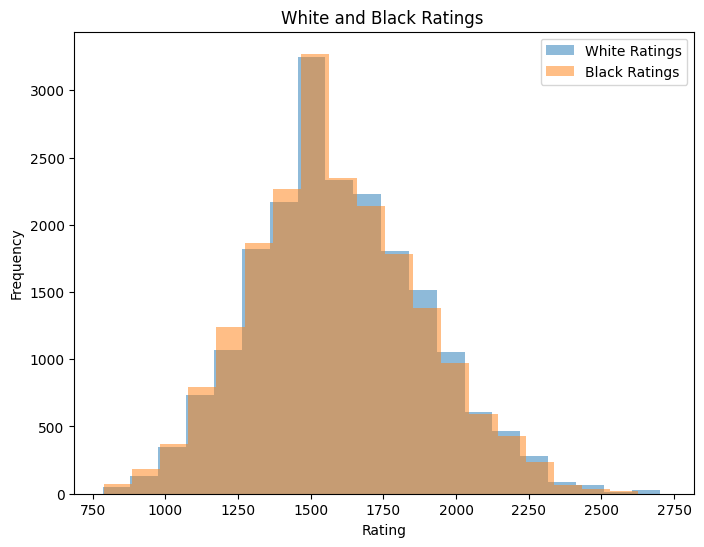

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['white_rating'], bins=20, alpha=0.5, label='White Ratings')
plt.hist(dataset['black_rating'], bins=20, alpha=0.5, label='Black Ratings')
plt.legend()
plt.title('White and Black Ratings ')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The matches recorded in the dataset are pretty fair as player's ratings has similar distributions. 

#### Victory Status

In [37]:
victory = dataset['victory_status'].value_counts()
victory

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

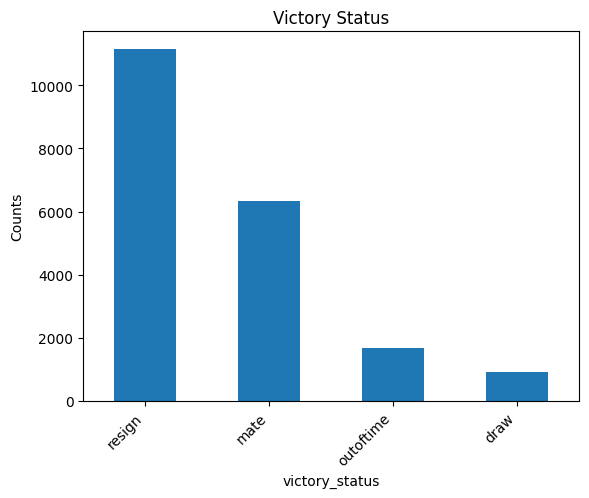

In [45]:
victory.plot(kind='bar')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Victory Status');

Most of the games end with resign and mate, while some are out of time or draw.

#### Distribution of Opening names 

In [28]:
name_counts = dataset['opening_name'].value_counts().sort_values(ascending=False)
name_counts

opening_name
Van't Kruijs Opening                                                 368
Sicilian Defense                                                     358
Sicilian Defense: Bowdler Attack                                     296
Scotch Game                                                          271
French Defense: Knight Variation                                     271
                                                                    ... 
Amazon Attack: Siberian Attack                                         1
Italian Game: Scotch Gambit                                            1
Semi-Slav Defense: Marshall Gambit |  Main Line                        1
Queen's Indian Defense: Classical Variation |  Polugaevsky Gambit      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation           1
Name: count, Length: 1477, dtype: int64

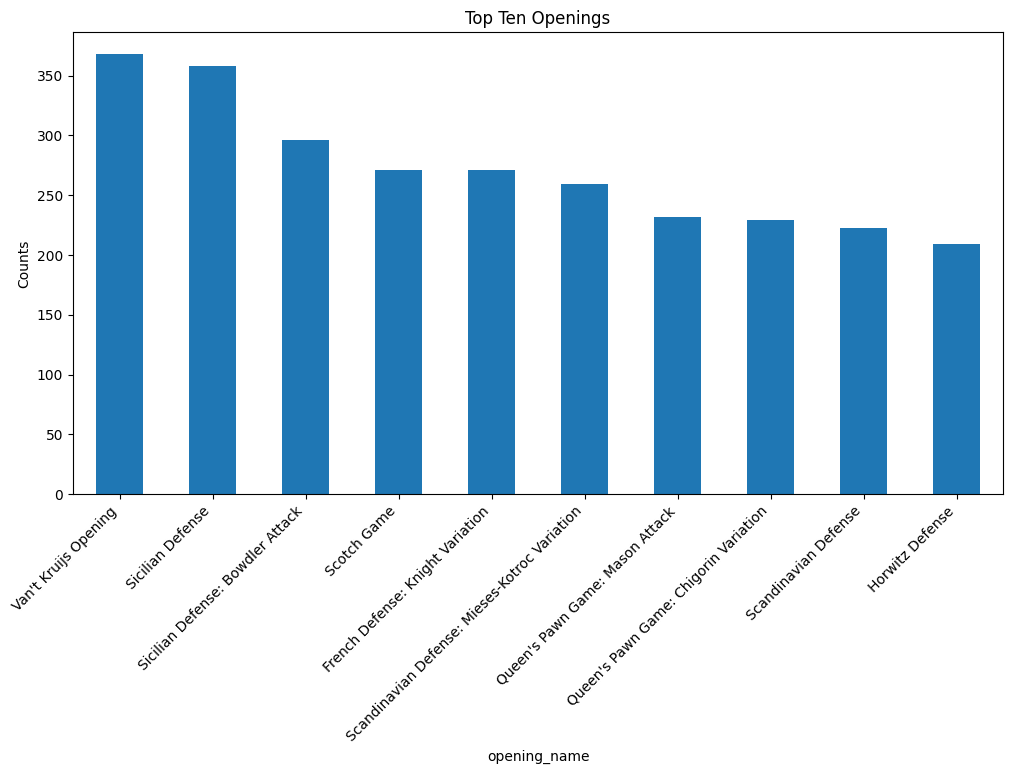

In [44]:
name_counts[:10].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Top Ten Openings');

#### Turns

In [40]:
turns = dataset['turns'].value_counts()
turns

turns
53     303
45     302
51     299
57     297
39     297
      ... 
216      1
208      1
176      1
218      1
201      1
Name: count, Length: 211, dtype: int64

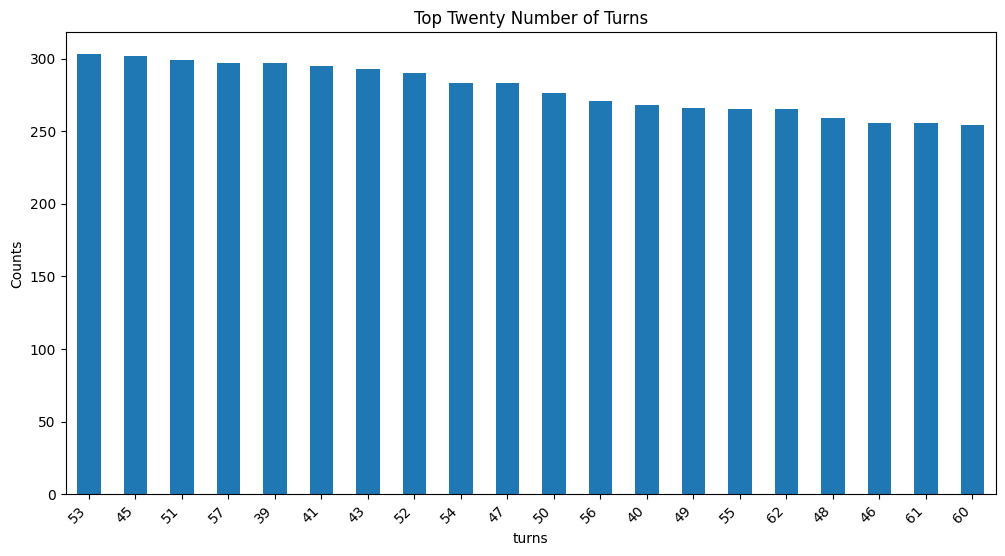

In [43]:
turns[:20].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', va='top')
plt.title('Top Twenty Number of Turns');

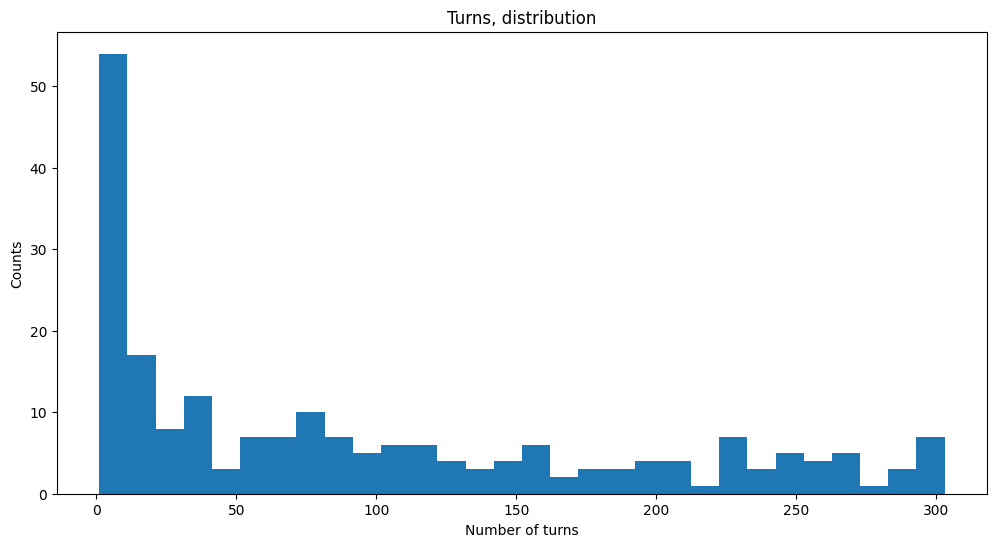

In [55]:
plt.figure(figsize=(12, 6))
plt.hist(turns, bins=30)
plt.ylabel('Counts')
plt.xlabel('Number of turns')
plt.title('Turns, distribution')
plt.show()

It is a right skewed distribution. Most of the games ends under 50 turns. 

In [56]:
# Extract all the moves from the dataset. 
moves = dataset['moves']

In [57]:
print(dataset.iloc[5])
print(moves[5])

id                                            MsoDV9wj
rated                                            False
created_at                             1504240000000.0
last_move_at                           1504240000000.0
turns                                                5
victory_status                                    draw
winner                                            draw
increment_code                                    10+0
white_id                                     trelynn17
white_rating                                      1250
black_id                                 franklin14532
black_rating                                      1002
moves                                 e4 c5 Nf3 Qa5 a3
opening_eco                                        B27
opening_name      Sicilian Defense: Mongoose Variation
opening_ply                                          4
Name: 5, dtype: object
e4 c5 Nf3 Qa5 a3


In [58]:
# One move in the game
moves[100]

'e4 e6 d4 d5 Nc3 c5 exd5 exd5 Nf3 Nc6 Bb5 Nf6 O-O Be7 dxc5 O-O Bg5 h6 Bxf6 Bxf6 Nxd5 Bxb2 Rb1 Ba3 Re1 Bxc5 Bd3 Be6 c4 b6 Be4 Rc8 Qa4 Ne7 Rbd1 Nxd5 cxd5 Bd7 Qb3 Qf6 Bb1 Bd6 Qd3 g6 h3 Qf4 Re4 Qf6 Qe3 Rfe8 Qxh6 Rxe4 Bxe4 Bf4 Qh4 Qxh4 Nxh4 Bd6 g4 a5 Nf3 b5 Nd4 Rc4 Bg2 Bc5 Nc6 Bxc6 dxc6 Be7 Bd5 Rc5 Kg2 Kg7 Rd3 Kf6 f4 g5 Kf3 Kg6 Ke4 f6 fxg5 fxg5 Rf3 Bf6 Rf5 Rc2 Rf3 Re2+ Re3 Rc2 Kf3 b4 Be4+ Kg7 Bxc2 a4 Bxa4 Kg6 c7'

Number of moves and number of turns are correlated. It is pretty intuitive to see the more turns the game has, the more move the play will make.

### Dataset two (SQLite database)

Due to the size of this dataset, it is stored in a database.

The original data was in PGN (Portable Game Notation) format, which looks like this:

This is the data of a single game. 

After all the game information, each move is listed with its corresponding stockfish evaluation.

<img src="Images/PNGfile.png" width="600"/>

Each move in a game was then formated in the following format so it is much clearer and usable. It includes move id, FEN (text encoding of the position), binary representation of the board for direct use by the model and the evaluation.

<img src="Images/formated.png" width="600"/>

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Ethics & Privacy

### Privacy and Anonymity
While our primary data (chess positions and engine evaluations) does not involve personal information, we take user data privacy seriously. In cases where we collect gameplay data or feedback from users interacting with the AI, strict anonymization protocols will be followed to ensure compliance with data protection regulations such as GDPR and CCPA.

### Ethical Use of Intellectual Property
Our project leverages open-source tools and datasets provided by entities like Stockfish and Lichess. We commit to respecting the intellectual property rights associated with these resources. This includes adhering to license agreements, acknowledging contributions, and ensuring all software and data used are either open source or properly licensed.

### Transparency and Misrepresentation
We are committed to transparency about our AI's capabilities, the development process, and its limitations to prevent any potential misinterpretation or misuse. This includes clear communication about how the AI makes decisions and its performance across different chess scenarios.

### Unintended Consequences
Deploying AI in competitive environments such as chess tournaments may lead to unintended consequences, including ethical concerns about AI assistance in human-only competitions. We will actively engage with the chess community to monitor and address any issues that arise from the AI's deployment.

### Tool Assistance
To address ethical concerns systematically, we will utilize tools like the [Deon checklist](https://deon.drivendata.org), which assists in ensuring that ethical considerations are integrated throughout the project lifecycle. This approach helps in maintaining ethical integrity in data collection, model training, and the deployment phases of the Chess AI.

Our commitment extends beyond just avoiding misuse of AI; we aim to proactively engage with the community to ensure our Chess AI enhances the game without compromising ethical standards or privacy.


# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
